In [3]:
'''file_path=r"C:\Users\sutir\OneDrive\Desktop\Rot_curve\TRGB_Gaia.csv"
cep=pd.read_csv(file_path)
ra_array = np.array(cep['ra']) * u.degree
dec_array = np.array(cep['dec']) * u.degree
distance_array = (np.array(cep['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(cep['pmra']) * u.mas / u.yr
pm_dec_array = np.array(cep['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(cep['radial_velocity']) * u.km / u.s
l=np.array(cep['l']) * u.degree
b=np.array(cep['b']) * u.degree '''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 14-15: truncated \UXXXXXXXX escape (658908467.py, line 10)

In [4]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

file_path=r"C:\Users\sutir\OneDrive\Desktop\Rot_curve\TRGB_Gaia.csv"
cep=pd.read_csv(file_path)
ra_array = np.array(cep['ra']) * u.degree
dec_array = np.array(cep['dec']) * u.degree
distance_array = (np.array(cep['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(cep['pmra']) * u.mas / u.yr
pm_dec_array = np.array(cep['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(cep['radial_velocity']) * u.km / u.s
l=np.array(cep['l']) * u.degree
b=np.array(cep['b']) * u.degree 




'''cep=np.loadtxt('GC.txt')
ra_array = cep[1:, 2]* u.degree
dec_array =cep[1:, 3] * u.degree
distance_array = (cep[1:, 1] * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = cep[1:, 5] * u.mas / u.yr
pm_dec_array = cep[1:, 6] * u.mas / u.yr
radial_velocity_array = cep[1:, 4] * u.km / u.s
l=cep[1:, 7] * u.degree
b=cep[1:, 8]* u.degree '''


# Constants
U_sun, V_sun, W_sun = 11.1* u.km / u.s, 12.24* u.km / u.s, 7.25* u.km / u.s  # Solar motion (km/s)
V0 = 233   * u.km / u.s  # Galactic rotation speed (km/s)
R0 = 8.3 * u.kpc

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity,l,b):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1,12.24, 7.25] * (u.km / u.s)))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    v_x, v_y, v_z = g.v_x.value, g.v_y.value, g.v_z.value
    d=distance
    # Convert to cylindrical coordinates
    R = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    v_R = (x * v_x + y * v_y) / R
    v_phi = (x * v_y - y * v_x) / R
    r=np.sqrt(R0**2 + d**2 - 2 * R0 * d * np.cos(b) * np.cos(l))
    v_gsr=radial_velocity + U_sun * np.cos(b) * np.cos(l) + \
           V_sun * np.cos(b) * np.sin(l) + \
           W_sun * np.sin(b) + V0 * np.cos(b) * np.sin(l)

    v_c=(R/R0)*((v_gsr/(np.sin(l)*np.cos(b))+V0))
    

    return np.array([R, phi, z, v_R, v_phi, v_z, np.abs(z),r,v_gsr,v_c])
#plt.scatter((transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]),(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]),s=1)


In [ ]:
transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, l, b)[7]

array([8.70617193, 8.09114208, 7.79173488, ..., 7.48443949, 8.0393005 ,
       4.68327929])

(-100.0, 500.0)

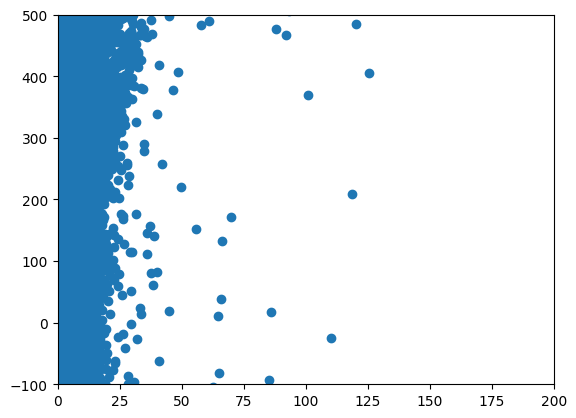

In [ ]:
plt.scatter(transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, l, b)[0],transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, l, b)[9])
plt.xlim(0,200)
plt.ylim(-100,500)

    Bin Center      Mean X     Mean Y       Std Y  Num Points
0     1.606153    2.221014  -4.912057  110.210635     33099.0
1     4.358370    4.792973 -12.362206  123.939076    208290.0
2     7.110587    7.329883 -12.707003  163.465289   1530239.0
3     9.862805    9.448223   7.258486  147.247273    712067.0
4    12.615022   12.107376  -9.591565   93.922065     68747.0
5    15.367239   15.015412  -5.166936  107.013718      7532.0
6    18.119457   17.942703  -2.432441  126.050365      2302.0
7    20.871674   20.754316   3.575777  133.486226      1187.0
8    23.623891   23.542327   6.432089  134.461496       725.0
9    30.833333   30.015844   0.647682  138.890919      1660.0
10   42.500000   41.829494  -2.657980  135.157064       715.0
11   54.166667   53.521465  -8.994659  138.909351       394.0
12   65.833333   65.459347  -9.949466  136.480272       261.0
13   77.500000   77.225723 -14.736529  135.314737       174.0
14   89.166667   88.511966   5.994817  134.590000       131.0
15  121.

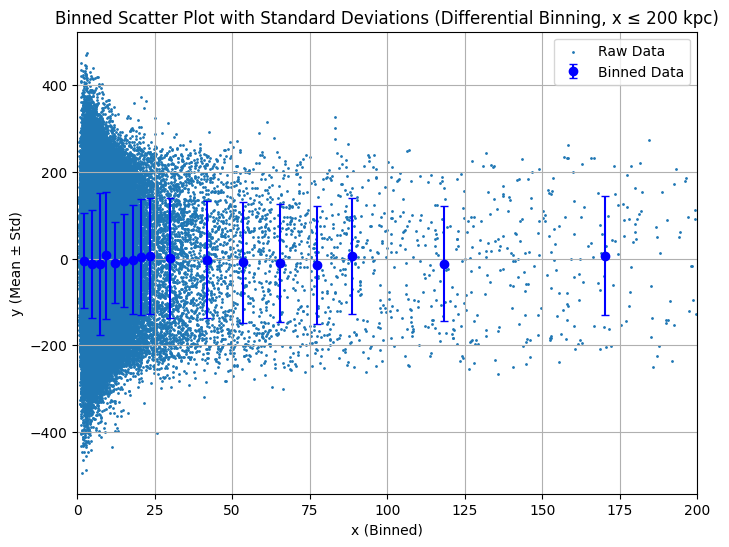

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

# Example data
np.random.seed(42)  # For reproducibility
x = (transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, l, b)[7])
y = (transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, l, b)[8])

# Remove NaN values
valid = ~np.isnan(x) & ~np.isnan(y)
x_clean = x[valid]
y_clean = y[valid]

# Restrict data to x <= 200 kpc
valid_range = x_clean <= 200
x_clean = x_clean[valid_range]
y_clean = y_clean[valid_range]

# Define custom bin edges for differential binning
custom_bin_edges = np.concatenate([
    np.linspace(np.min(x_clean), 25, 10),  # 10 bins in range [min(x), 50]
    np.linspace(25, 95, 7)[1:],          # 5 bins in range (50, 150]
    np.linspace(95, np.max(x_clean), 3)[1:]  # 2 bins in range (150, max(x)]
])
bin_centers = 0.5 * (custom_bin_edges[:-1] + custom_bin_edges[1:])

# Compute statistics
mean_x, _, _ = binned_statistic(x_clean, x_clean, statistic='mean', bins=custom_bin_edges)
mean_y, _, _ = binned_statistic(x_clean, y_clean, statistic='mean', bins=custom_bin_edges)
std_y, _, _ = binned_statistic(x_clean, y_clean, statistic='std', bins=custom_bin_edges)
n_points, _, _ = binned_statistic(x_clean, y_clean, statistic='count', bins=custom_bin_edges)

# Create DataFrame
binned_data = pd.DataFrame({
    'Bin Center': bin_centers,
    'Mean X': mean_x,
    'Mean Y': mean_y,
    'Std Y': std_y,
    'Num Points': n_points
})

# Drop rows with NaN values (e.g., empty bins)
binned_data = binned_data.dropna()
binned_data_restricted = binned_data[binned_data['Bin Center'] <= 200]
# Display DataFrame
print(binned_data_restricted)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x_clean, y_clean, s=1, label='Raw Data')
plt.errorbar(binned_data['Mean X'], binned_data['Mean Y'], 
             yerr=binned_data['Std Y'], fmt='o', label='Binned Data', 
             color='blue', capsize=3)
plt.xlim(0, 200)
plt.xlabel('x (Binned)')
plt.ylabel('y (Mean ± Std)')
plt.title('Binned Scatter Plot with Standard Deviations (Differential Binning, x ≤ 200 kpc)')
plt.grid()
plt.legend()
plt.show()


Fitted parameters:
a = 0.044977186
b = -0.384653124


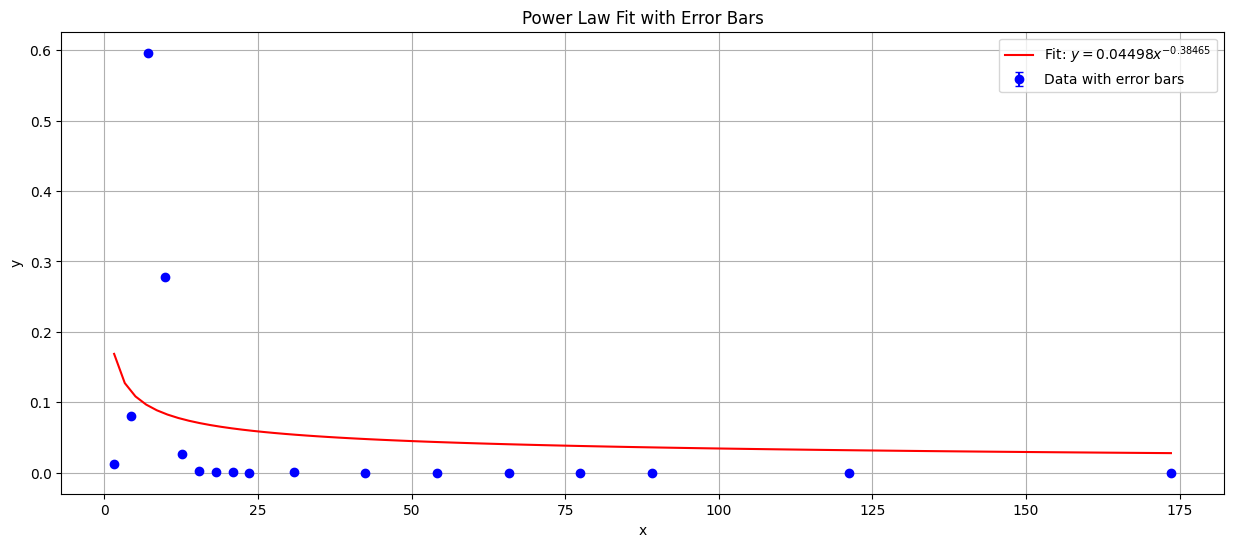

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example data setup (replace this with your actual data)
np.random.seed(42)
n_tr = binned_data_restricted['Num Points'] / len(x_clean)  # Replace with your data
s_gsr = binned_data_restricted['Std Y']                    # Replace with your data
r_bin = binned_data_restricted['Bin Center']               # Replace with your data

# Define the power-law function
def power_law(x, a, b):
    return a * (x/50)**b

# Fit the power law to the data
popt, pcov = curve_fit(power_law, r_bin, n_tr, p0=(1, 1))  # Initial guesses for a and b
fitted_a_n, fitted_b_n = popt

# Generate fitted curve
x_fit = np.linspace(min(r_bin), max(r_bin), 100)
y_fit = power_law(x_fit, fitted_a_n, fitted_b_n)

# Calculate error bars (sqrt of n_tr)
error_bars = np.sqrt(n_tr/len(x_clean))

# Print fitted parameters
print(f"Fitted parameters:")
print(f"a = {fitted_a_n:.9f}")
print(f"b = {fitted_b_n:.9f}")

# Plot the data with error bars and the fitted curve
plt.figure(figsize=(15, 6))
plt.errorbar(r_bin, n_tr, yerr=error_bars, fmt='o', label='Data with error bars', color='blue', capsize=3)
plt.plot(x_fit, y_fit, label=f'Fit: $y = {fitted_a_n:.5f} x^{{{fitted_b_n:.5f}}}$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power Law Fit with Error Bars')
plt.legend()
plt.grid()
#plt.ylim(0,0.05)
plt.show()


Fitted parameters:
a = 0.000208571
b = -0.980022469


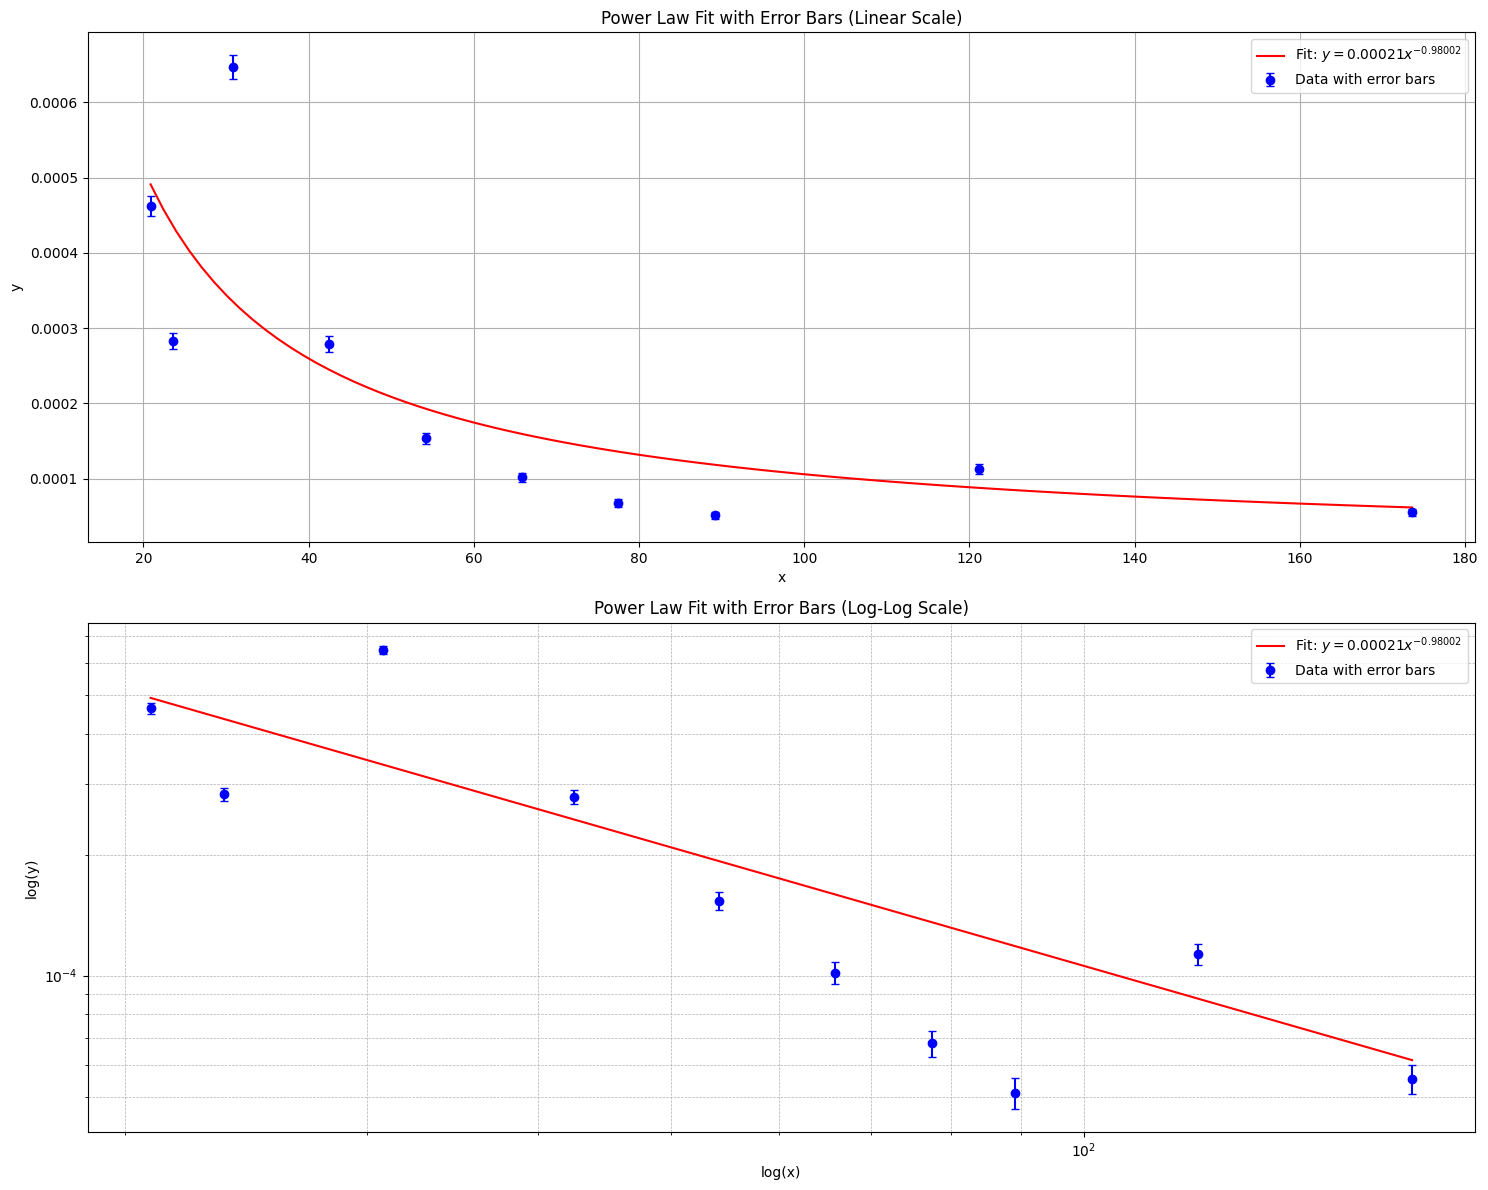

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example data setup (replace this with your actual data)
np.random.seed(42)
n_tr = binned_data_restricted['Num Points'] / len(x_clean)  # Replace with your data
s_gsr = binned_data_restricted['Std Y']                    # Replace with your data
r_bin = binned_data_restricted['Bin Center']               # Replace with your data

# Filter data for x >= 25
filter_mask = r_bin >= 20
r_bin_filtered = r_bin[filter_mask]
n_tr_filtered = n_tr[filter_mask]

# Define the power-law function
def power_law(x, a, b):
    return a * (x/50)**b

# Fit the power law to the filtered data
popt, pcov = curve_fit(power_law, r_bin_filtered, n_tr_filtered, p0=(1, 1))  # Initial guesses for a and b
fitted_a_n_1, fitted_b_n_1 = popt

# Generate fitted curve for filtered data
x_fit = np.linspace(min(r_bin_filtered), max(r_bin_filtered), 100)
y_fit = power_law(x_fit, fitted_a_n_1, fitted_b_n_1)

# Calculate error bars (sqrt of n_tr)
error_bars = np.sqrt(n_tr_filtered/len(x_clean))

# Print fitted parameters
print(f"Fitted parameters:")
print(f"a = {fitted_a_n_1:.9f}")
print(f"b = {fitted_b_n_1:.9f}")

# Create a figure with two subplots
plt.figure(figsize=(15, 12))

# Regular plot
plt.subplot(2, 1, 1)
plt.errorbar(r_bin_filtered, n_tr_filtered, yerr=error_bars, fmt='o', label='Data with error bars', color='blue', capsize=3)
plt.plot(x_fit, y_fit, label=f'Fit: $y = {fitted_a_n_1:.5f} x^{{{fitted_b_n_1:.5f}}}$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power Law Fit with Error Bars (Linear Scale)')
plt.legend()
plt.grid()
#plt.ylim(0, 0.01)

# Log-log plot
plt.subplot(2, 1, 2)
plt.errorbar(r_bin_filtered, n_tr_filtered, yerr=error_bars, fmt='o', label='Data with error bars', color='blue', capsize=3)
plt.plot(x_fit, y_fit, label=f'Fit: $y = {fitted_a_n_1:.5f} x^{{{fitted_b_n_1:.5f}}}$', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Power Law Fit with Error Bars (Log-Log Scale)')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Fitted parameters:
a = 133.704
b = 0.028


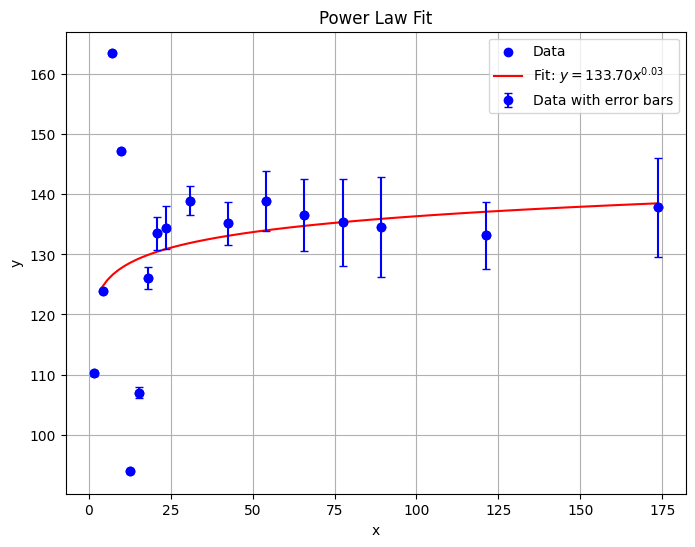

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate example data (y = 2 * x^1.5 with some noise)
np.random.seed(42)
n_tr=(binned_data_restricted['Num Points']/len(x_clean))
s_gsr=binned_data_restricted['Std Y']
r_bin=binned_data_restricted['Bin Center']
# Define the power-law function
def power_law(x, a, b):
    return a * (x/50)**b

# Fit the power law to the data
popt, pcov = curve_fit(power_law, r_bin, s_gsr, p0=(1, 1))  # Initial guesses for a and b
fitted_a_s, fitted_b_s = popt

# Generate fitted curve
x_fit = np.linspace(4, max(r_bin), 100)
y_fit = power_law(x_fit, fitted_a_s, fitted_b_s)

# Print results
print(f"Fitted parameters:")
print(f"a = {fitted_a_s:.3f}")
print(f"b = {fitted_b_s:.3f}")
N = np.array(binned_data_restricted['Num Points'])
error_bars=np.sqrt(1 / (2 * (N - 1))) * s_gsr
# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(r_bin,s_gsr , label='Data', color='blue')
plt.plot(x_fit, y_fit, label=f'Fit: $y = {fitted_a_s:.2f} x^{{{fitted_b_s:.2f}}}$', color='red')
plt.errorbar(r_bin, s_gsr, yerr=error_bars, fmt='o', label='Data with error bars', color='blue', capsize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power Law Fit')
plt.legend()
plt.grid()
plt.show()


In [ ]:
s_gsr ,r

(0     127.846058
 1     116.337302
 2     132.716346
 3     116.496952
 4     157.706290
 5      68.114582
 6     115.990911
 7      93.206551
 8     128.492882
 9     136.500412
 10    122.666952
 11     49.449015
 12     49.629432
 Name: Std Y, dtype: float64,
 <Quantity [  1.57275398,   3.74066528,   5.90857657,   8.07648787,
             10.24439917,  12.41231046,  14.58022176,  16.74813306,
             18.91604435,  33.08547134,  59.25641402,  85.4273567 ,
            111.59829938] kpc>)

(0.0, 200.0)

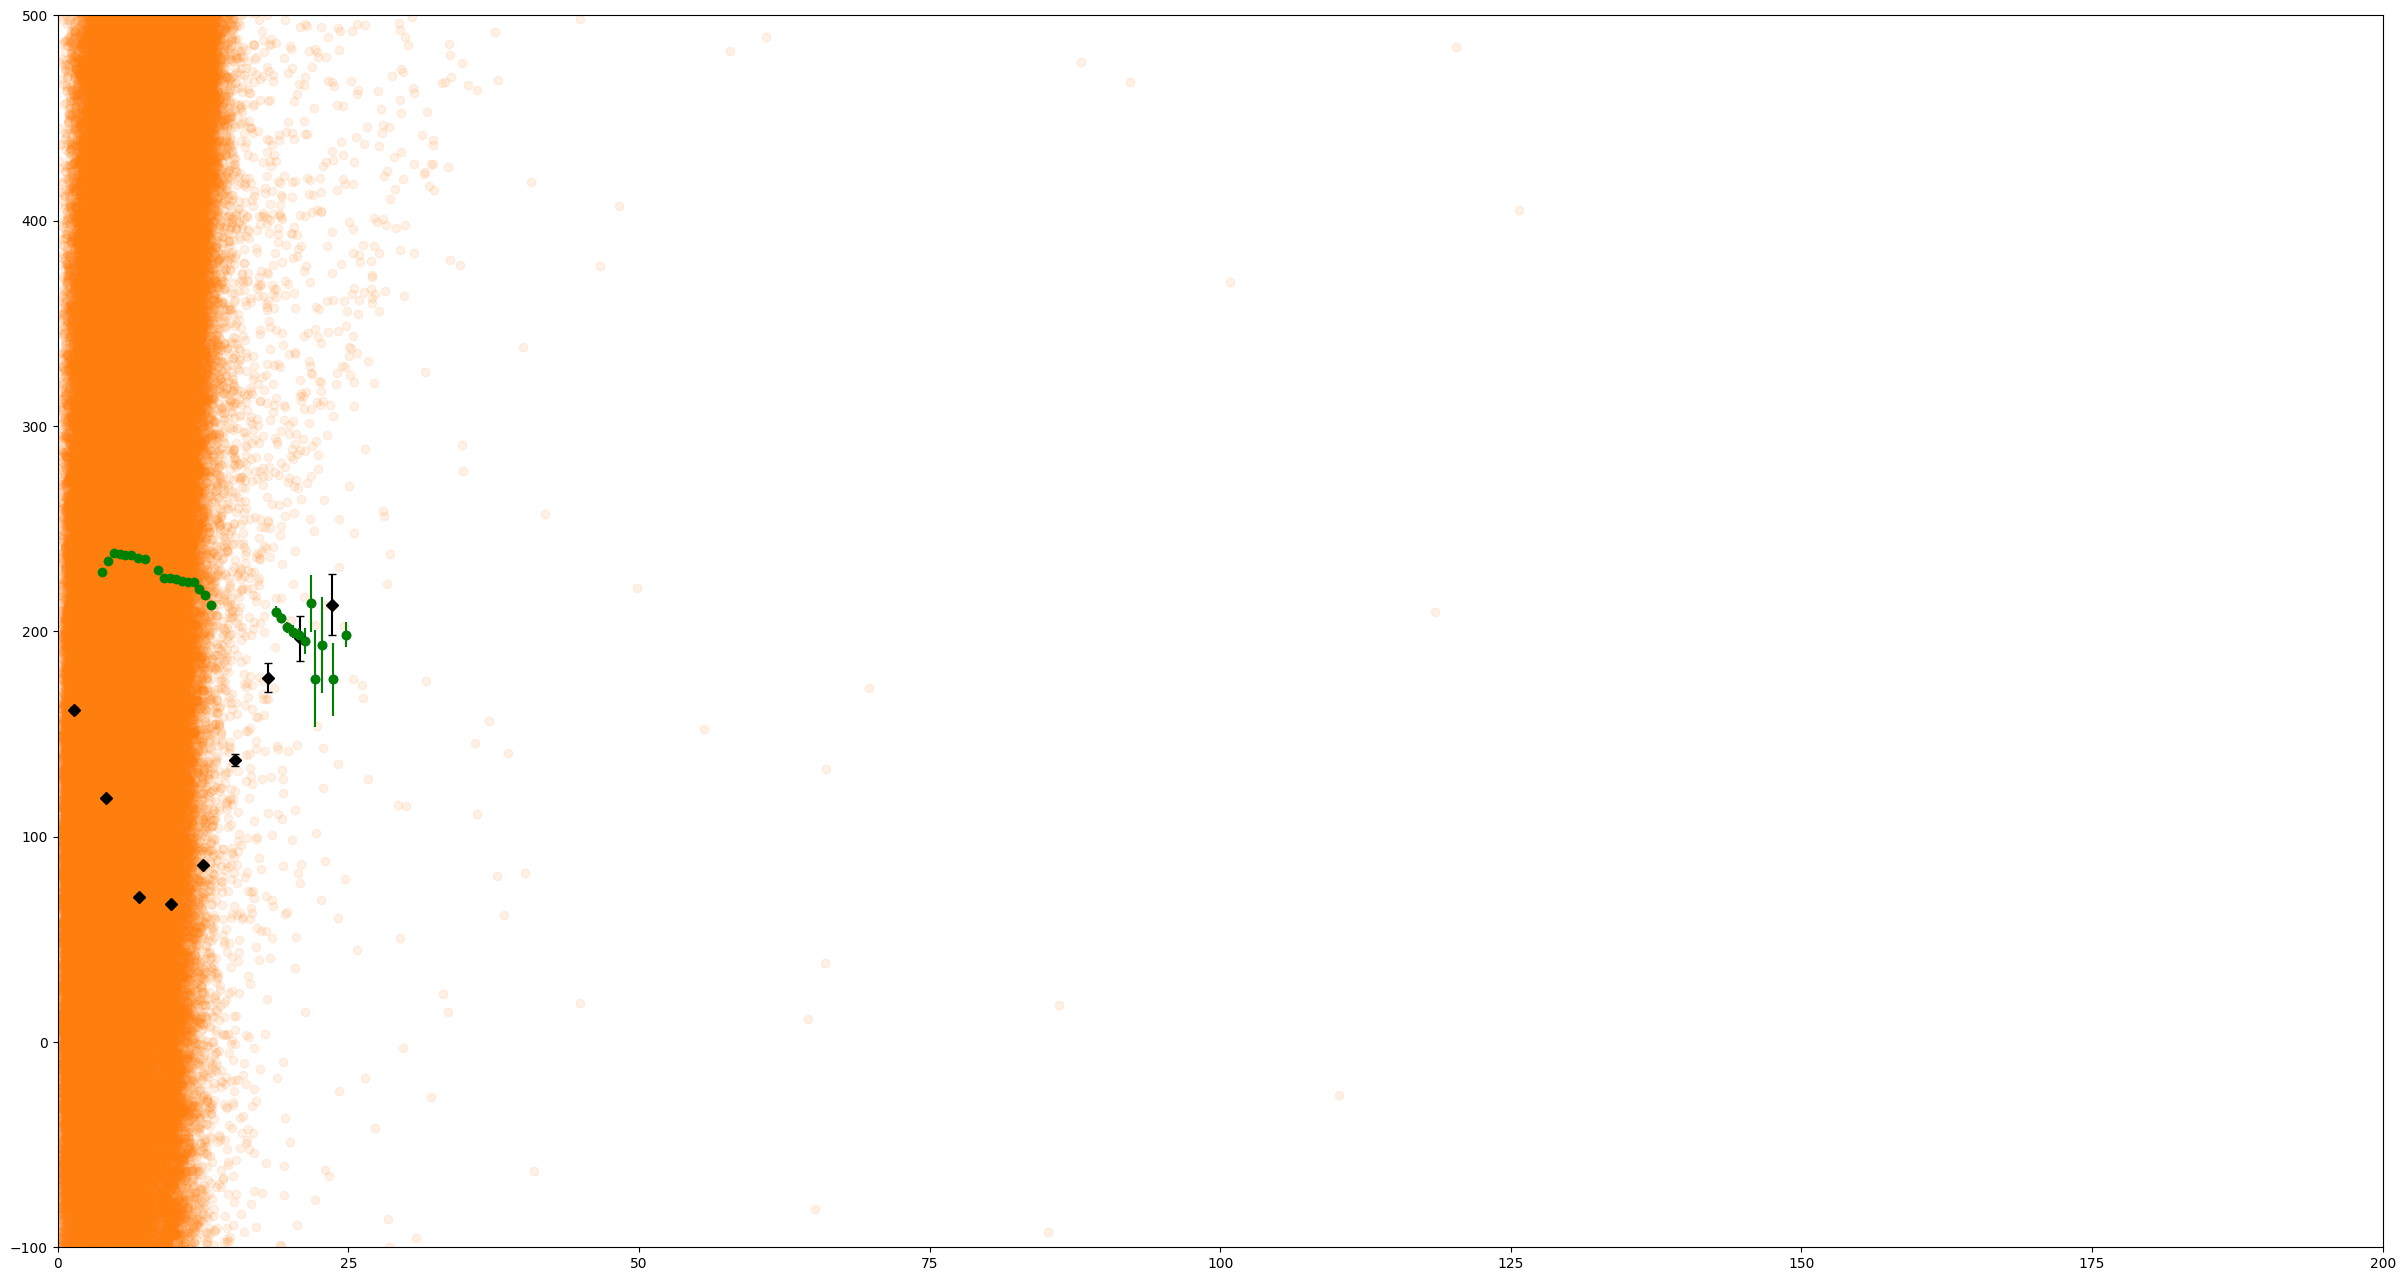

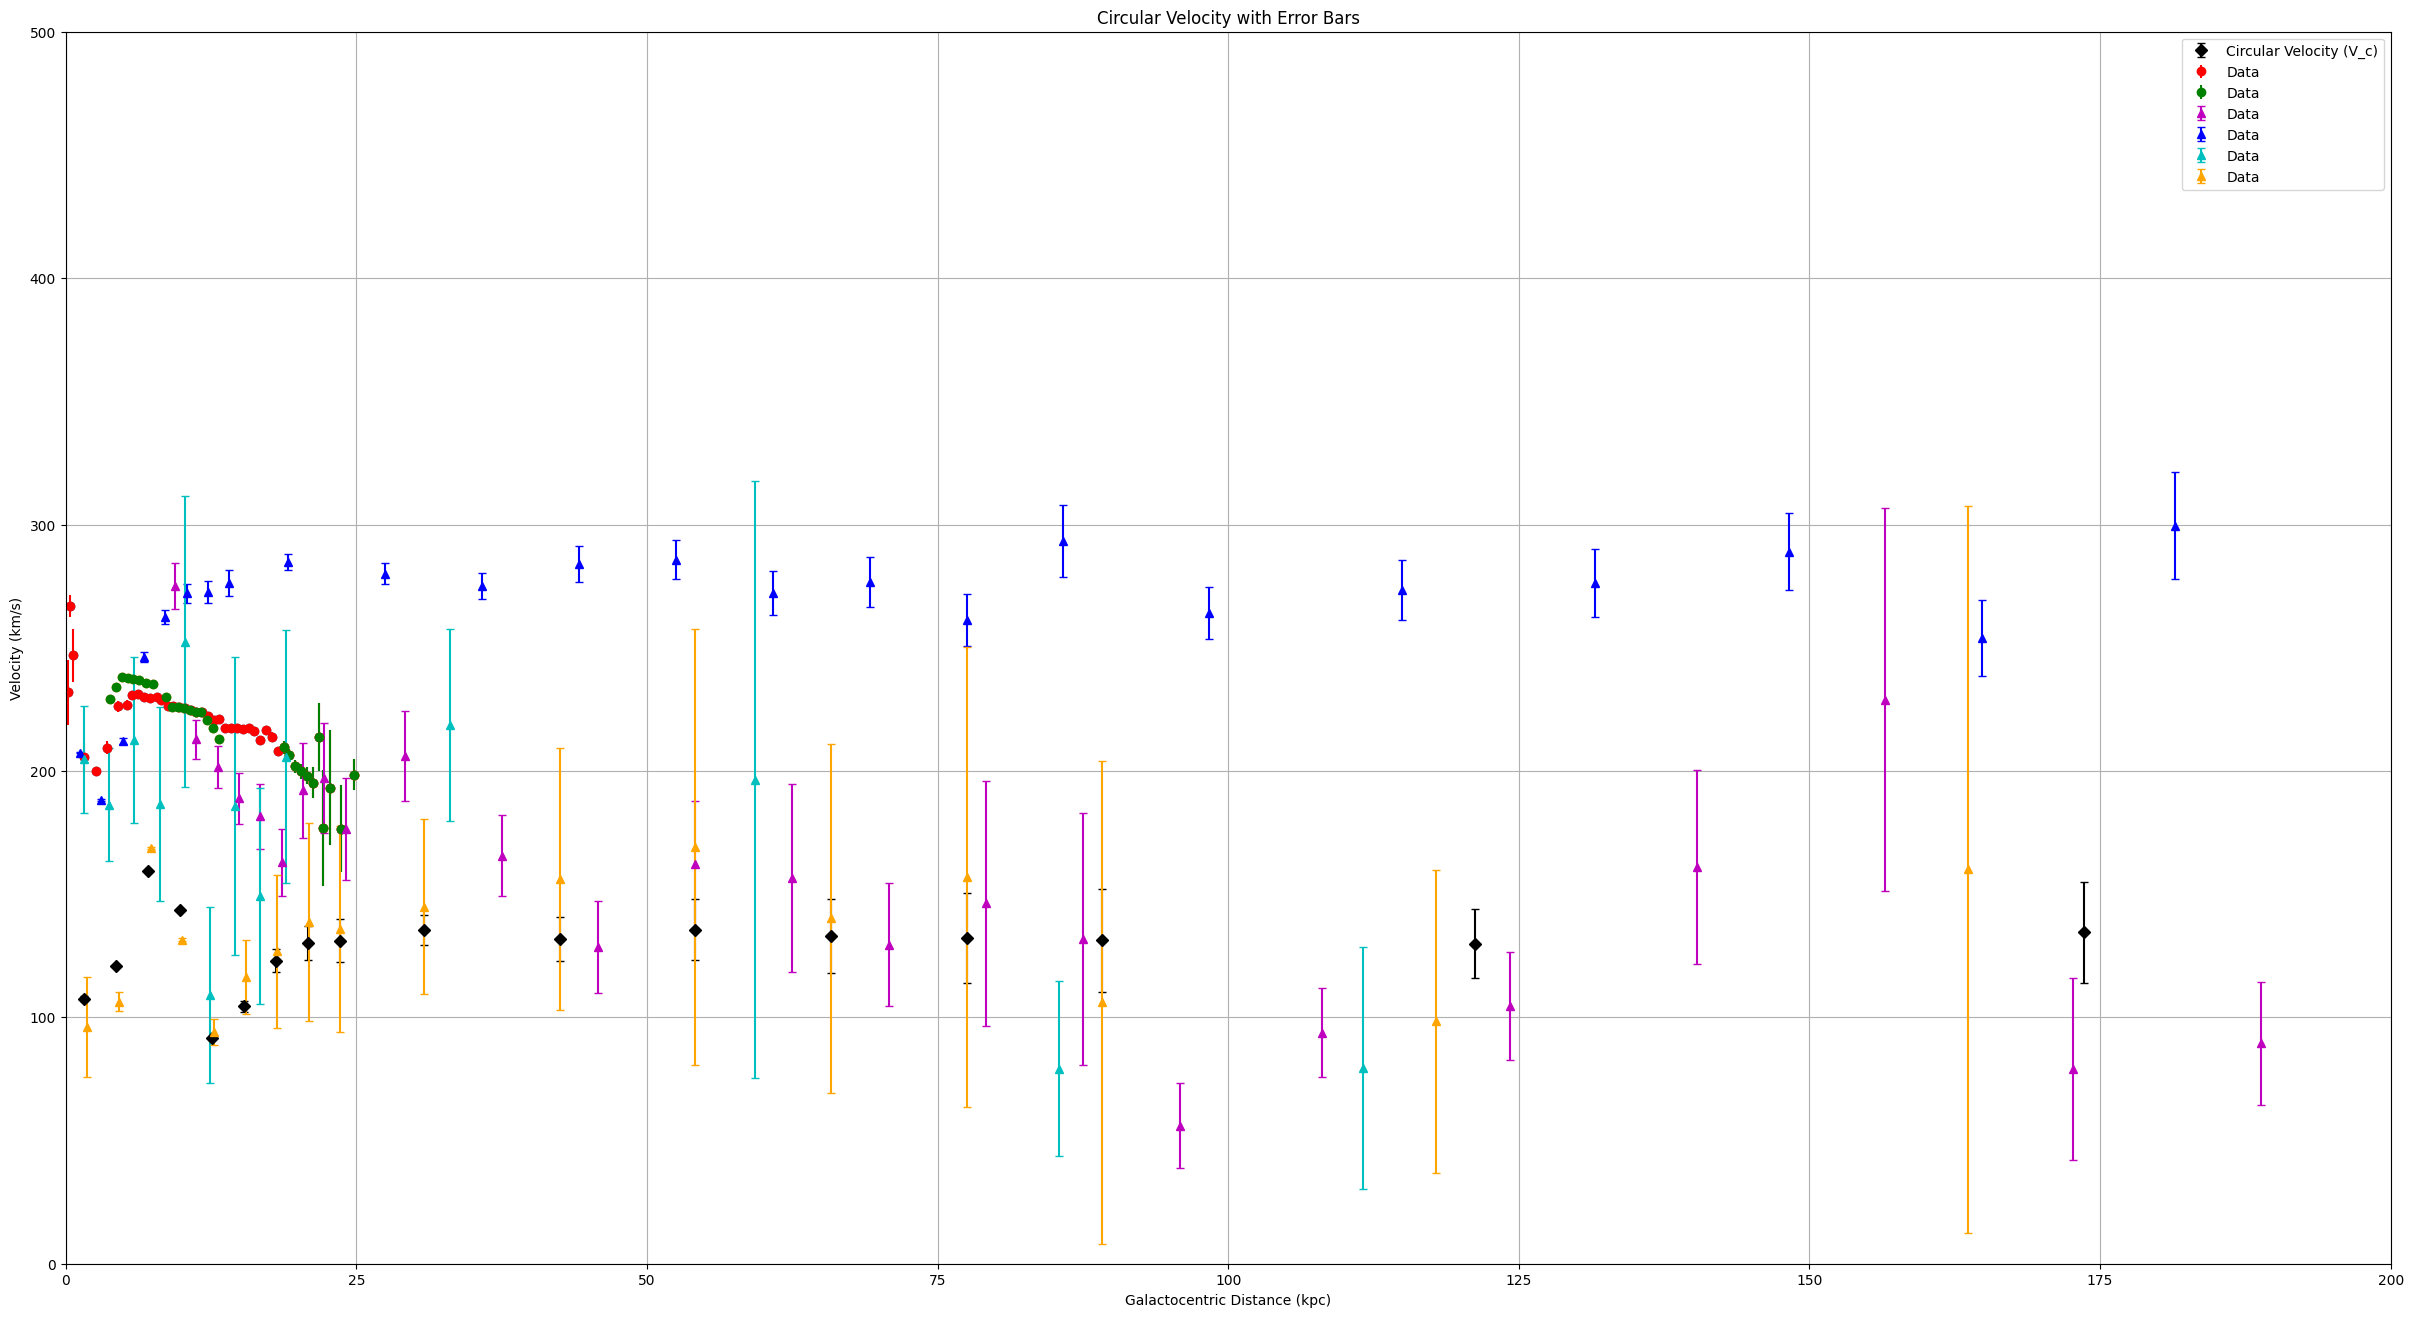

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

# Constants
beta =0
r = np.array(binned_data_restricted['Bin Center']) * u.kpc
H_r = (r**2 + R0**2) / (4 * r**2) - ((r**2 - R0**2)**2) / (8 * r**3 * R0) * np.log(abs((r + R0) / (r - R0)))

# Calculate sigma_r
sigma_r = np.array(binned_data_restricted['Std Y']) / np.sqrt(1 - beta * H_r)

# Log derivatives
dln_ntr_dlR =fitted_b_n_1
dln_sigma_r2_dlR = fitted_b_s

# Calculate V_c
V_c = np.sqrt(np.abs(-sigma_r**2 * (dln_ntr_dlR + dln_sigma_r2_dlR + 2 * beta)))

# Calculate errors for sigma_r and n_tr
N = np.array(binned_data_restricted['Num Points'])
error_sigma_r = np.sqrt(1 / (2 * (N - 1))) * sigma_r  # Error on sigma_r
error_ntr = np.sqrt(N)  # Poissonian error for number density

# Error propagation for V_c
error_V_c = np.sqrt(
    (2 * sigma_r * error_sigma_r / V_c)**2 +  # Contribution from sigma_r
    (sigma_r**2 * error_ntr / (V_c * N))**2  # Contribution from n_tr
)

# Plot results

plt.figure(figsize=(30, 16))
#plt.xscale("log")
# Scatter plot of number of tracers
#plt.scatter(np.array(binned_data_restricted['Bin Center']), np.array(binned_data_restricted['Num Points']), label='Tracer Population', s=3)

# Plot V_c with error bars
plt.errorbar(
    np.array(binned_data_restricted['Bin Center']),
    V_c,
    yerr=error_V_c,
    fmt='D',
    label='Circular Velocity (V_c)',
    color='k',
    capsize=3
)

data = np.loadtxt('tiprgb_bhatt.txt')
        


        # Extract x and y columns
x, y,e = data[:, 0], data[:, 1] ,data[:,2]

        # Plot the data

plt.scatter(x, y)
plt.errorbar(x, y,yerr=e, fmt='o', color='r', label='Data')

data1 = np.loadtxt('RV+Eilers.txt')
        


        # Extract x and y columns
x1, y1,e1 = data1[:, 0], data1[:, 1] ,data1[:,2]

        # Plot the data

plt.scatter(x1, y1)
plt.errorbar(x1, y1,yerr=e1, fmt='o', color='g', label='Data')

plt.xlim(0, 200)
plt.ylim(0, 500)




cep_gdr3 = np.loadtxt('Cephieds.txt')
        


        # Extract x and y columns
x1, y1,e1 = cep_gdr3[1:, 0], cep_gdr3[1:, 1] ,cep_gdr3[1:,2]

        # Plot the data


plt.errorbar(x1, y1,yerr=e1, fmt='^', color='m', label='Data',capsize=3)


TRGB_gdr3 = np.loadtxt('TRGB.txt')
        


        # Extract x and y columns
x1, y1,e1 = TRGB_gdr3[1:, 0], TRGB_gdr3[1:, 1] ,TRGB_gdr3[1:,2]

        # Plot the data


plt.errorbar(x1-10, y1-5,yerr=e1, fmt='^', color='b', label='Data',capsize=3)

GC_gdr3 = np.loadtxt('GC_gdr3.txt')
        


        # Extract x and y columns
x1, y1,e1 = GC_gdr3[1:, 0], GC_gdr3[1:, 1] ,GC_gdr3[1:,2]

        # Plot the data


plt.errorbar(x1, y1,yerr=e1, fmt='^', color='c', label='Data',capsize=3)

GC_gdr3 = np.loadtxt('OBA_gaia3.txt')
        


        # Extract x and y columns
x1, y1,e1 = GC_gdr3[1:, 0], GC_gdr3[1:, 1] ,GC_gdr3[1:,2]

        # Plot the data


plt.errorbar(x1, y1,yerr=e1, fmt='^', color='orange', label='Data',capsize=3)

plt.xlim(0,200)


# Plot formatting

plt.xlabel('Galactocentric Distance (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Circular Velocity with Error Bars')
plt.legend()
plt.grid()
plt.show()




DataFrame saved as OBA_gaia3.txt


<ErrorbarContainer object of 3 artists>

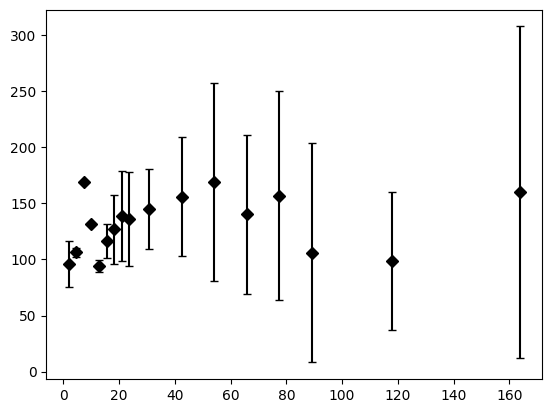

In [ ]:
data = {
    '0': np.array(binned_data_restricted['Bin Center']),
    '1': V_c,
    '2': error_V_c
}
df = pd.DataFrame(data)

# Save as a .txt file (tab-delimited)
txt_file_path = "TRGB.txt"
df.to_csv(txt_file_path, sep='\t', index=False)

print(f"DataFrame saved as {txt_file_path}")
# Plot V_c with error bars
plt.errorbar(
    np.array(binned_data_restricted['Bin Center']),
    V_c,
    yerr=error_V_c,
    fmt='D',
    label='Circular Velocity (V_c)',
    color='k',
    capsize=3
)

<ErrorbarContainer object of 3 artists>

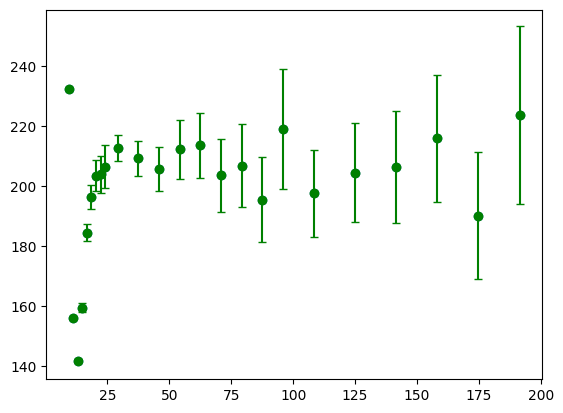

In [ ]:
G3_sdss = np.loadtxt('GC_gdr3.txt')
        


        # Extract x and y columns
x1, y1,e1 = G3_sdss[1:, 0], G3_sdss[1:, 1] ,G3_[1:,2]

        # Plot the data


plt.errorbar(x1, y1,yerr=e1, fmt='^', color='c', label='Data',capsize=3)



plt.xlim(0,200)


# Plot formatting

plt.xlabel('Galactocentric Distance (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Circular Velocity with Error Bars')
plt.legend()
plt.grid()
plt.show()